In [1]:
import torch
import re

In [2]:
neuron_info_path = "/data/lypan/llm_interpre/neuron_info/bloom-7b1/"
lang_agnos = torch.load(neuron_info_path + "lang_agnos_importance.pth")
lang_speci = torch.load(neuron_info_path + "lang_speci_importance.pth")

In [3]:
def extract_numbers_from_string(input_string):
    # 使用正则表达式查找所有数字
    numbers = re.findall(r'\d+', input_string)
    # 将提取到的数字转换为整数或浮点数，根据需要
    numbers = [int(num) for num in numbers]  # 如果您想要整数
    # 或者使用以下行，如果您想要浮点数
    # numbers = [float(num) for num in numbers]
    return numbers

In [5]:
lang_code_list = ['arb_Arab', 'fra_Latn', 'spa_Latn', 'eng_Latn', 'deu_Latn', 'ita_Latn', 'jpn_Jpan', 'rus_Cyrl', 'zho_Hans', 'zho_Hant']
lang_direction_list = ["ar-en", "de-en", "it-en", "fr-en", "zh-en", "en-ar", "en-de", "en-it", "en-fr", "en-zh"]
layers_cnt = 30
lang_speci_score = {key: [0] * layers_cnt for key in lang_code_list}
lang_agnos_score = {key: [0] * layers_cnt for key in lang_code_list}

In [6]:
for key in lang_speci.keys():
    if len(extract_numbers_from_string(key)) > 0:
        layer_num = extract_numbers_from_string(key)[0]
        print(layer_num)
        for lang in lang_speci[key].keys():
            non_zero_num = torch.nonzero(lang_speci[key][lang]).size(0)
            if non_zero_num == 0:
                continue
            lang_speci_score[lang][layer_num] += (sum(lang_speci[key][lang]) / non_zero_num)

for key in lang_agnos.keys():
    if len(extract_numbers_from_string(key)) > 0:
        layer_num = extract_numbers_from_string(key)[0]
        print(layer_num)
        for lang in lang_agnos[key].keys():
            non_zero_num = torch.nonzero(lang_agnos[key][lang]).size(0)
            if non_zero_num == 0:
                continue
            lang_agnos_score[lang][layer_num] += (sum(lang_agnos[key][lang]) / non_zero_num)

0
0
0
0
0
0
1
1
1
1
1
1
2
2
2
2
2
2
3
3
3
3
3
3
4
4
4
4
4
4
5
5
5
5
5
5
6
6
6
6
6
6
7
7
7
7
7
7
8
8
8
8
8
8
9
9
9
9
9
9
10
10
10
10
10
10
11
11
11
11
11
11
12
12
12
12
12
12
13
13
13
13
13
13
14
14
14
14
14
14
15
15
15
15
15
15
16
16
16
16
16
16
17
17
17
17
17
17
18
18
18
18
18
18
19
19
19
19
19
19
20
20
20
20
20
20
21
21
21
21
21
21
22
22
22
22
22
22
23
23
23
23
23
23
24
24
24
24
24
24
25
25
25
25
25
25
26
26
26
26
26
26
27
27
27
27
27
27
28
28
28
28
28
28
29
29
29
29
29
29
0
0
0
0
0
0
1
1
1
1
1
1
2
2
2
2
2
2
3
3
3
3
3
3
4
4
4
4
4
4
5
5
5
5
5
5
6
6
6
6
6
6
7
7
7
7
7
7
8
8
8
8
8
8
9
9
9
9
9
9
10
10
10
10
10
10
11
11
11
11
11
11
12
12
12
12
12
12
13
13
13
13
13
13
14
14
14
14
14
14
15
15
15
15
15
15
16
16
16
16
16
16
17
17
17
17
17
17
18
18
18
18
18
18
19
19
19
19
19
19
20
20
20
20
20
20
21
21
21
21
21
21
22
22
22
22
22
22
23
23
23
23
23
23
24
24
24
24
24
24
25
25
25
25
25
25
26
26
26
26
26
26
27
27
27
27
27
27
28
28
28
28
28
28
29
29
29
29
29
29


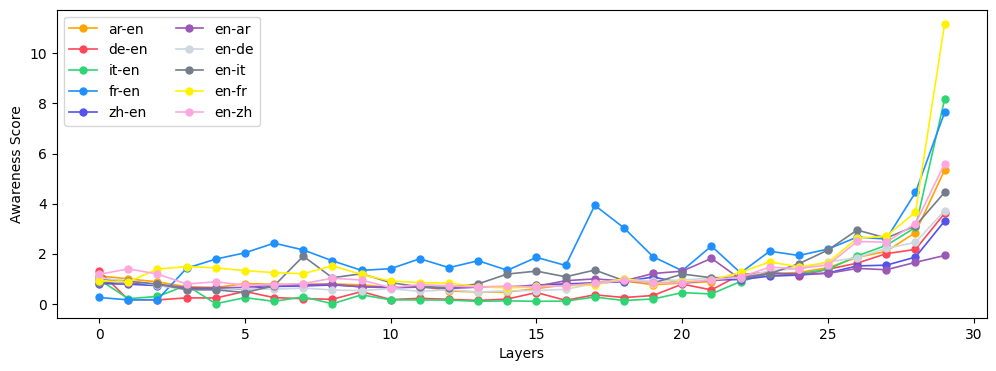

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

color_list = ["#ffa502", "#ff4757", "#2ed573", "#1e90ff", "#5352ed", "#9b59b6", "#ced6e0", "#747d8c", "#fff200", "#FDA7DF"]

cnt = 0
for key in lang_speci_score.keys():
    x_values = list(range(layers_cnt))
    y_values = lang_speci_score[key]
    plt.plot(x_values, y_values, marker='o', linestyle='-', label=lang_direction_list[cnt], color=color_list[cnt], linewidth=1.2, markersize=5)
    cnt += 1

plt.xlabel('Layers')
plt.ylabel('Awareness Score')

plt.legend(ncol=2)
plt.savefig('lang_speci_import_score.pdf', format='pdf', dpi=300)
plt.show()

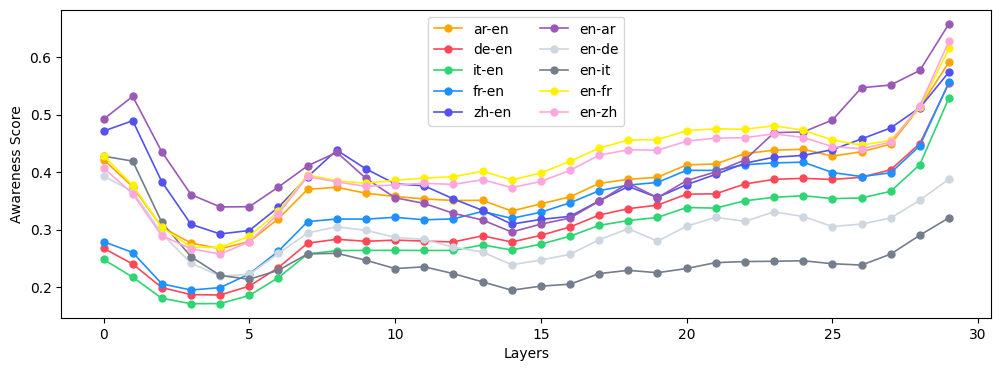

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

cnt = 0
for key in lang_agnos_score.keys():
    x_values = list(range(layers_cnt))
    y_values = lang_agnos_score[key]
    plt.plot(x_values, y_values, marker='o', linestyle='-', label=lang_direction_list[cnt], color=color_list[cnt], linewidth=1.2, markersize=5)
    cnt += 1

plt.xlabel('Layers')
plt.ylabel('Awareness Score')

plt.legend(ncol=2)
plt.savefig('lang_agnos_import_score.pdf', format='pdf', dpi=300)
plt.show()

In [10]:
lang_merge_score = {key: [0] * layers_cnt for key in lang_code_list}
for key in lang_speci.keys():
    if len(extract_numbers_from_string(key)) > 0:
        layer_num = extract_numbers_from_string(key)[0]
        print(layer_num)
        for lang in lang_speci[key].keys():
            merge_tensor = lang_speci[key][lang] + lang_agnos[key][lang]
            lang_merge_score[lang][layer_num] += (sum(merge_tensor) / merge_tensor.shape[0])

0
0
0
0
0
0
1
1
1
1
1
1
2
2
2
2
2
2
3
3
3
3
3
3
4
4
4
4
4
4
5
5
5
5
5
5
6
6
6
6
6
6
7
7
7
7
7
7
8
8
8
8
8
8
9
9
9
9
9
9
10
10
10
10
10
10
11
11
11
11
11
11
12
12
12
12
12
12
13
13
13
13
13
13
14
14
14
14
14
14
15
15
15
15
15
15
16
16
16
16
16
16
17
17
17
17
17
17
18
18
18
18
18
18
19
19
19
19
19
19
20
20
20
20
20
20
21
21
21
21
21
21
22
22
22
22
22
22
23
23
23
23
23
23
24
24
24
24
24
24
25
25
25
25
25
25
26
26
26
26
26
26
27
27
27
27
27
27
28
28
28
28
28
28
29
29
29
29
29
29


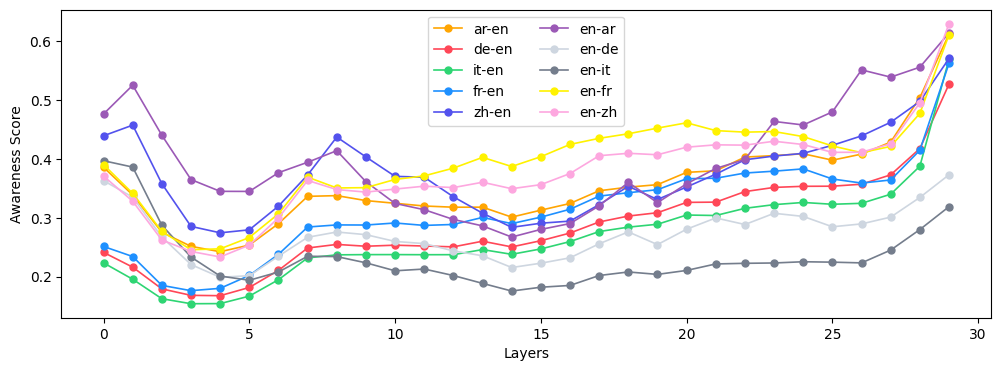

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

color_list = ["#ffa502", "#ff4757", "#2ed573", "#1e90ff", "#5352ed", "#9b59b6", "#ced6e0", "#747d8c", "#fff200", "#FDA7DF"]

cnt = 0
for key in lang_merge_score.keys():
    x_values = list(range(layers_cnt))
    y_values = lang_merge_score[key]
    plt.plot(x_values, y_values, marker='o', linestyle='-', label=lang_direction_list[cnt], color=color_list[cnt], linewidth=1.2, markersize=5)
    cnt += 1

plt.xlabel('Layers')
plt.ylabel('Awareness Score')

plt.legend(ncol=2)
plt.savefig('lang_merge_import_score.pdf', format='pdf', dpi=300)
plt.show()